In [21]:
n=5
N = (n + 4 ) % 5 + 1
print('Вариант:',N)

Вариант: 5


In [1]:
import pandas as pd
import numpy as np 

In [2]:
baby_names = pd.read_csv("NationalNames.csv")

In [3]:
#Задание 2
baby_names.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
#Задание 4
baby_names.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [5]:
#Задание 6
baby_names.groupby('Gender')[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


In [6]:
#Задание 7
baby_names[(baby_names['Gender']=='M')&(baby_names['Year']==2010)].nlargest(5, 'Count')

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [7]:
#Задание 9
baby_names[baby_names['Count']==min(baby_names['Count'])].shape[0]

254615

In [8]:
#Задание 10
baby_names.groupby('Year')[['Name']].nunique().head()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


In [9]:
#Задание 15
baby_names.groupby('Year')[['Count']].sum().head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [10]:
#Задание 16
a= baby_names.groupby('Year')[['Count']].sum()
b=a[a['Count']==max(a['Count'])].index
b[0]

1957

In [31]:
#Задание 17
baby_names.groupby(['Year','Gender'])[['Count']].sum().unstack().head()


Count        
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445

In [36]:
#Задание 18
n=baby_names.groupby(['Year','Gender'])[['Count']].sum().unstack()
sum(n['Count'].F>n['Count'].M)

54

In [220]:
#Задание 20
n=baby_names.groupby(['Name','Gender'])[['Year']].count().unstack()
m=n[(n['Year'].F.notnull())&(n['Year'].M.notnull())]
m.count()[0]

10221

In [22]:
#Задание 21
b=baby_names[(baby_names['Name']=='Barbara')&(baby_names['Gender']=='M')].sum()
b[4]

4139

In [282]:
#Задание 22
print('Спостереження проводилося',max(baby_names['Year'])-min(baby_names['Year']-1),'років')

Спостереження проводилося 135 років


In [118]:
#Задание 23
n=baby_names.groupby(['Name','Gender'])[['Year']].count().unstack()
m=n[(n['Year'].F.notnull())&(n['Year'].M.notnull())]
pd.DataFrame(list(m[(m['Year'].F==135)&(m['Year'].M==135)].index), columns=list('0'))

,0
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [5]:
#Задание 24
n1=baby_names.groupby(['Name','Gender'])[['Year','Count']].sum().unstack()
n2=n1[(n1['Count'].F.notnull())&(n1['Count'].M.notnull())&(n1['Count'].F!=n1['Count'].M)&((n1['Year'].F<10000)&(n1['Year'].M<10000))]
n3=n2[((n2['Count'].M+n2['Count'].F)==(n2['Count'].M+n2['Count'].F).max())].index
print('Найпопулярніше серед непопулярних імен:',n3[0],'. Кількість:',(n2['Count'].M+n2['Count'].F).max())


Найпопулярніше серед непопулярних імен: Jionni . Кількість: 652.0


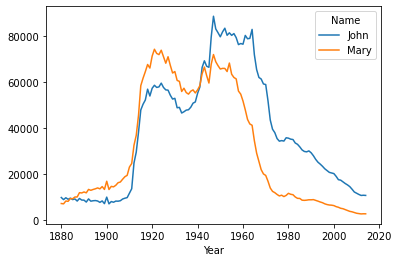

In [115]:
#Задание 25
n=baby_names.groupby(['Year','Name'])[['Count']].sum().unstack()
n['Count'].John.plot()
n['Count'].Mary.plot().legend(['John','Mary'], title = 'Name');


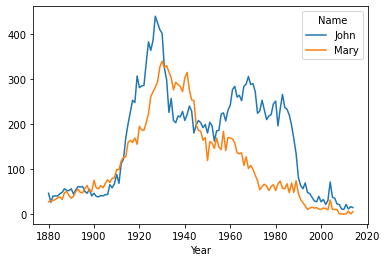

In [114]:
#Задание 26
n=baby_names.groupby(['Year','Name','Gender'])[['Count']].sum().unstack()
n1=n['Count'].F
n2=n['Count'].M
n1.groupby(['Year','Name']).sum().unstack().John.plot()
n2.groupby(['Year','Name']).sum().unstack().Mary.plot().legend(['John','Mary'], title = 'Name');

In [20]:
#Задание 27
n=baby_names.groupby(['Year'])[['Count']].max()
m=n['Count'].unique()
s = []
for i in range(len(m)):
    a=baby_names[['Year','Name','Count']][(baby_names['Year']==1880+i)&(baby_names['Count']==m[i])].values
    s.append(a[0])
d = pd.DataFrame(s, columns=['Year','Name','Count'])
d.set_index('Year', inplace=True)
d

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267


In [10]:
n=baby_names.sort_values(by='Count',ascending=False).groupby(['Year']).agg({'Name':'first','Count':'first'})
n

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
